# STFT and ISTFT

I'd like to make my own spectrogram, so that I can play with Gabor logons, AKA Heisenberg boxes. 

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, rfft, irfft, fftfreq, rfftfreq
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

From [Stack Overflow](http://stackoverflow.com/questions/2459295/invertible-stft-and-istft-in-python)

In [2]:
def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.signal.hann(framesamp)
    X = np.array([fft(w*x[i:i+framesamp]) for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    x = np.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += np.real(ifft(X[n]))
    return x

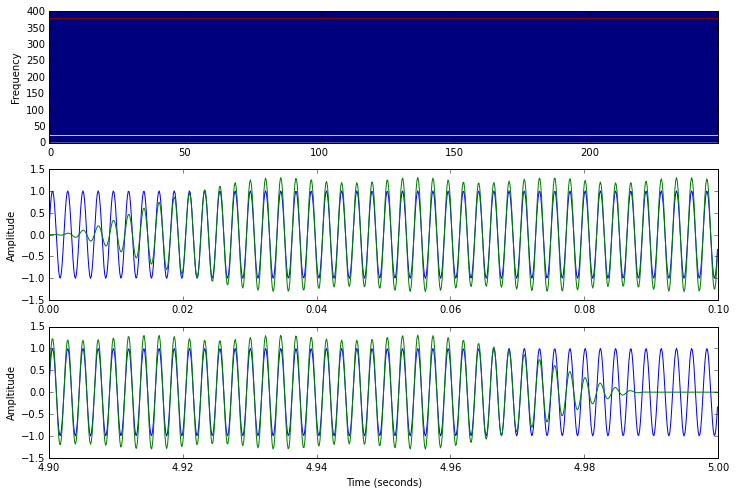

In [3]:
f0 = 440         # Compute the STFT of a 440 Hz sinusoid
fs = 8000        # sampled at 8 kHz
T = 5.           # lasting 5 seconds
framesz = 0.050  # with a frame size of 50 milliseconds
hop = 0.020      # and hop size of 20 milliseconds.

# Create test signal and STFT.
t = np.linspace(0, T, T*fs, endpoint=False)
x = np.sin(2*scipy.pi*f0*t)
X = stft(x, fs, framesz, hop)

# Plot the magnitude spectrogram.
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.imshow(np.absolute(X.T), origin='lower', aspect='auto', interpolation='none')
plt.ylabel('Frequency')

# Compute the ISTFT.
xhat = istft(X, fs, T, hop)

# Plot the input and output signals over 0.1 seconds.
T1 = int(0.1*fs)

plt.subplot(312)
plt.plot(t[:T1], x[:T1], t[:T1], xhat[:T1])
plt.ylabel('Amplitude')

plt.subplot(313)
plt.plot(t[-T1:], x[-T1:], t[-T1:], xhat[-T1:])
plt.xlabel('Time (seconds)')
plt.ylabel('Ampltitude')
plt.show()

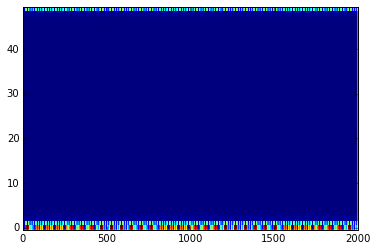

In [4]:
f0 = 10
fs = 1000
T = 2
framesz = 0.050
hop = 0.020

delta = int(T*fs/4)

y = np.sin(2*np.pi*f0*t) + np.sin(2*np.pi*3*f0*t)
y[delta] = 3.
y[-delta] = 3.

Y = stft(y, fs, framesz, hop)

plt.imshow(np.absolute(Y.T), origin='lower', aspect='auto', interpolation='none')

## Benchmark signals

In [5]:
# Let's make a function to plot a signal and its specgram

def tf(signal, fs, w=256, wtime=False, poverlap=None, xlim=None, ylim=None, colorbar=False, vmin=None, vmax=None, filename=None, interpolation="bicubic"):

    dt = 1./fs
    n = signal.size
    t = np.arange(0.0, n*dt, dt)
        
    if wtime:
        # Then the window length is time so change to samples
        w *= fs
        w = int(w)
        
    if poverlap:
        # Then overlap is a percentage
        noverlap = int(w * poverlap/100.)
    else:
        noverlap = w - 1
        
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(211)
    ax1.plot(t, signal)
    if xlim:
        ax1.set_xlim((0,xlim))
        
    ax2 = plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(signal, NFFT=w, Fs=fs, noverlap=noverlap, cmap='Greys', vmin=vmin, vmax=vmax, interpolation=interpolation)
    if colorbar: plt.colorbar()
    if ylim:
        ax2.set_ylim((0,ylim))
    if xlim:
        ax2.set_xlim((0,xlim))
        
    if filename: plt.savefig(filename)
        
    plt.show()

In [6]:
synthetic = np.loadtxt('benchmark_signals/synthetic.txt')

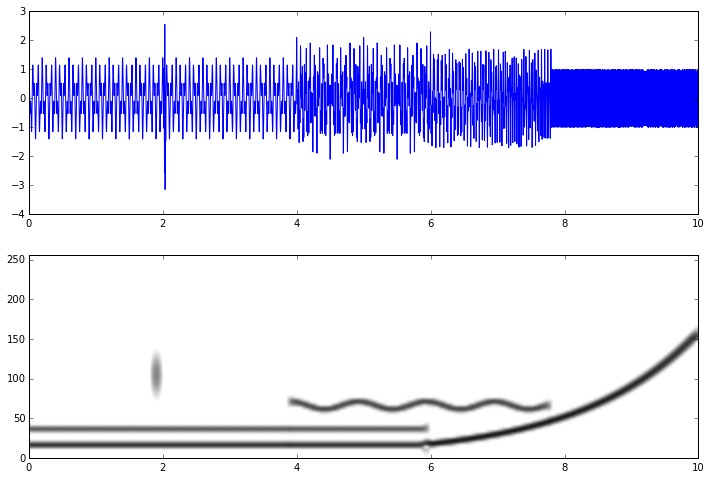

In [9]:
tf(synthetic, 800, w=256, xlim=10, ylim=256, vmin=-30, filename="/Users/matt/Pictures/stft_interpolated.png")

In [10]:
synthetic.shape

(8192,)

In [12]:
print("length of signal =", 8192/800.)

length of signal = 10.24


In [14]:
SYN = stft(synthetic, 800, 0.128, 0.010)
print(SYN.shape)

(1012, 102)


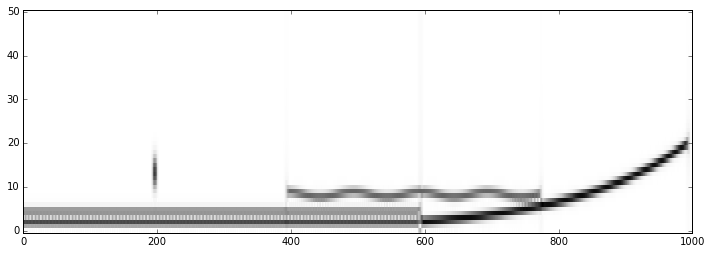

In [16]:
freqs = fftfreq(128, d=1/800.)

plt.figure(figsize=(12,4))
plt.imshow(np.absolute(SYN.T[:SYN.shape[1]/2.,:1000]), origin='lower', aspect='auto', interpolation='none', cmap="Greys")
#plt.ylim(freqs[0],freqs[-65])
#plt.colorbar()
plt.savefig("/Users/matt/Pictures/stft_uninterpolated.png")

In [17]:
fftfreq(128, d=1/800.)

array([   0.  ,    6.25,   12.5 ,   18.75,   25.  ,   31.25,   37.5 ,
         43.75,   50.  ,   56.25,   62.5 ,   68.75,   75.  ,   81.25,
         87.5 ,   93.75,  100.  ,  106.25,  112.5 ,  118.75,  125.  ,
        131.25,  137.5 ,  143.75,  150.  ,  156.25,  162.5 ,  168.75,
        175.  ,  181.25,  187.5 ,  193.75,  200.  ,  206.25,  212.5 ,
        218.75,  225.  ,  231.25,  237.5 ,  243.75,  250.  ,  256.25,
        262.5 ,  268.75,  275.  ,  281.25,  287.5 ,  293.75,  300.  ,
        306.25,  312.5 ,  318.75,  325.  ,  331.25,  337.5 ,  343.75,
        350.  ,  356.25,  362.5 ,  368.75,  375.  ,  381.25,  387.5 ,
        393.75, -400.  , -393.75, -387.5 , -381.25, -375.  , -368.75,
       -362.5 , -356.25, -350.  , -343.75, -337.5 , -331.25, -325.  ,
       -318.75, -312.5 , -306.25, -300.  , -293.75, -287.5 , -281.25,
       -275.  , -268.75, -262.5 , -256.25, -250.  , -243.75, -237.5 ,
       -231.25, -225.  , -218.75, -212.5 , -206.25, -200.  , -193.75,
       -187.5 , -181

In [19]:
# Gabor boxes
fw = 1/.128
tw = .128

print(fw, "Hz   ", tw, "s")

7.8125 Hz    0.128 s


## Complex display

In [20]:
import colorsys

In [21]:
fm = np.amax(np.abs(SYN))

In [22]:
np.amin(np.angle(SYN))

-3.1414501958536274

In [23]:
timesteps = []
for t in SYN.T:
    freqs = []
    for f in t:
        # This is not right, need phase angle and mag:
        #rgb = colorsys.hsv_to_rgb(f.imag, f.real, f.real)
        hue = 0.5 + (np.angle(f) / (2*np.pi))
        rgb = colorsys.hsv_to_rgb(hue, np.abs(f)/fm, 1.0)
        freqs.append(rgb)
    timesteps.append(freqs)
rgb_arr = np.array(timesteps)

In [24]:
rgb_arr.shape

(102, 1012, 3)

The `matplotlib` function `imshow` interprets arrays like this as 3-channel colour images, so we can just display this array directly. We'll chop off the negative frequencies again. 

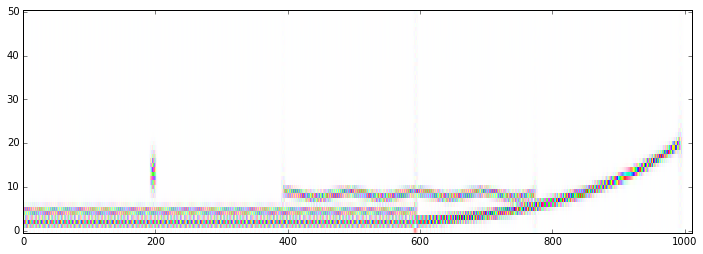

In [26]:
plt.figure(figsize=(12,4))
plt.imshow(rgb_arr[:rgb_arr.shape[0]/2.,...], aspect="auto", origin="lower", interpolation="none")
plt.savefig('/Users/matt/Pictures/stft_complex.png')
plt.show()

## Inverse STFT

In [27]:
SYN.shape
8192/800.

10.24

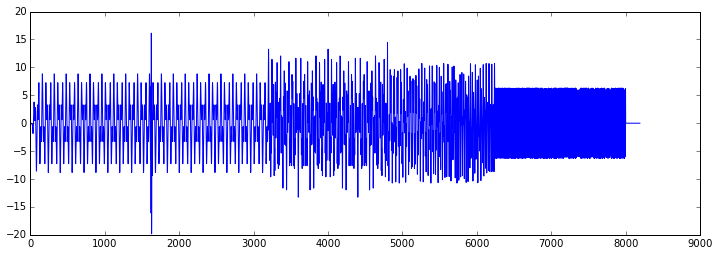

In [28]:
fs=800
T = 8192/800.
hop = 0.010

syn = istft(SYN, fs, T, hop)

plt.figure(figsize=(12,4))
plt.plot(syn)
plt.show()

## `PyTFD` implementation

I found a lightweight library for doing all sorts of time-frequency stuff: `pytfd`. [https://github.com/endolith/pytfd](PyTFD on Github)

In [29]:
import pytfd.stft

ImportError: No module named 'pytfd'

In [25]:
N = 256
t_max = 10
t = np.linspace(0, t_max, N)
fs = N/t_max
f = np.linspace(0, fs, N)

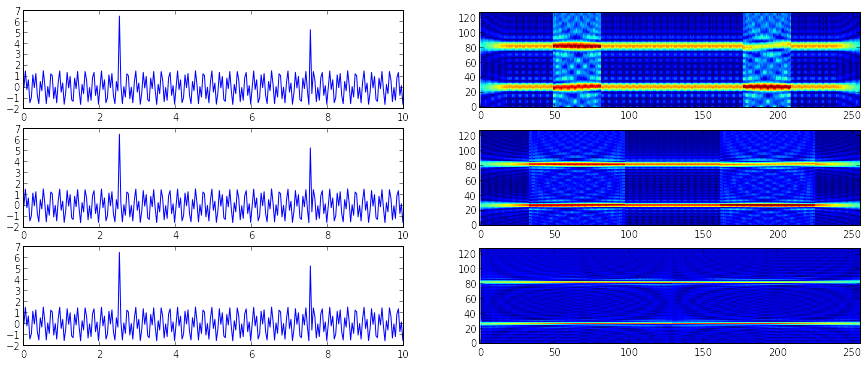

In [26]:
plt.figure(figsize=(15,6))
for i, T in enumerate([32, 64, 128]):
    w = scipy.signal.boxcar(T) # Rectangular window
    
    delta1 = np.zeros(N)
    delta1[N/4] = 5
    
    delta2 = np.zeros(N)
    delta2[-N/4] = 5
    
    y = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*30*t) + delta1 + delta2
    Y = pytfd.stft.stft(y, w)
    
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(t, y)
    #plt.xlabel("Time")
    #plt.ylabel("Amplitude")
    #plt.title(r"Signal")
    
    plt.subplot(3, 2, 2*i + 2)    
    plt.imshow(np.absolute(Y)[N/2:], interpolation="none", aspect=0.5, origin="lower")
    #plt.xlabel("Time")
    #plt.ylabel("Frequency")
    #plt.title(r"STFT T = %d$T_s$"%T)
      
plt.show()

Nice! But no inverse STFT.

## Uncertainty principle

The time and frequency localication of the window determine the localization of the result. 

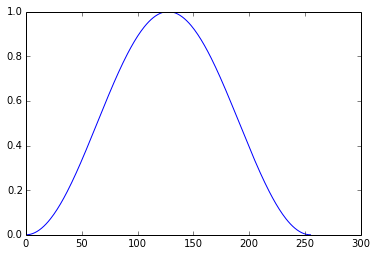

In [161]:
w = scipy.signal.hann(256)

plt.plot(w)
plt.show()

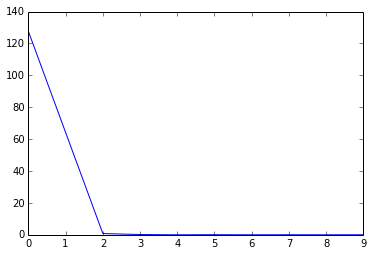

In [172]:
W = rfft(w)

plt.plot(np.absolute(W)[:10])
plt.show()

In [171]:
1/0.256

3.90625